In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("community_health_MLR.csv")
df.head(3)

,yas,cins,irk,kilo,boy,visits
0,47,0,4,112.0,165.0,28
1,26,1,3,128.0,168.0,23
2,26,1,2,91.0,173.0,14


In [8]:
# Bir satır daha ekleyeceğim

df["vki"] = round(df["kilo"] / (df["boy"]/100)**2,2)

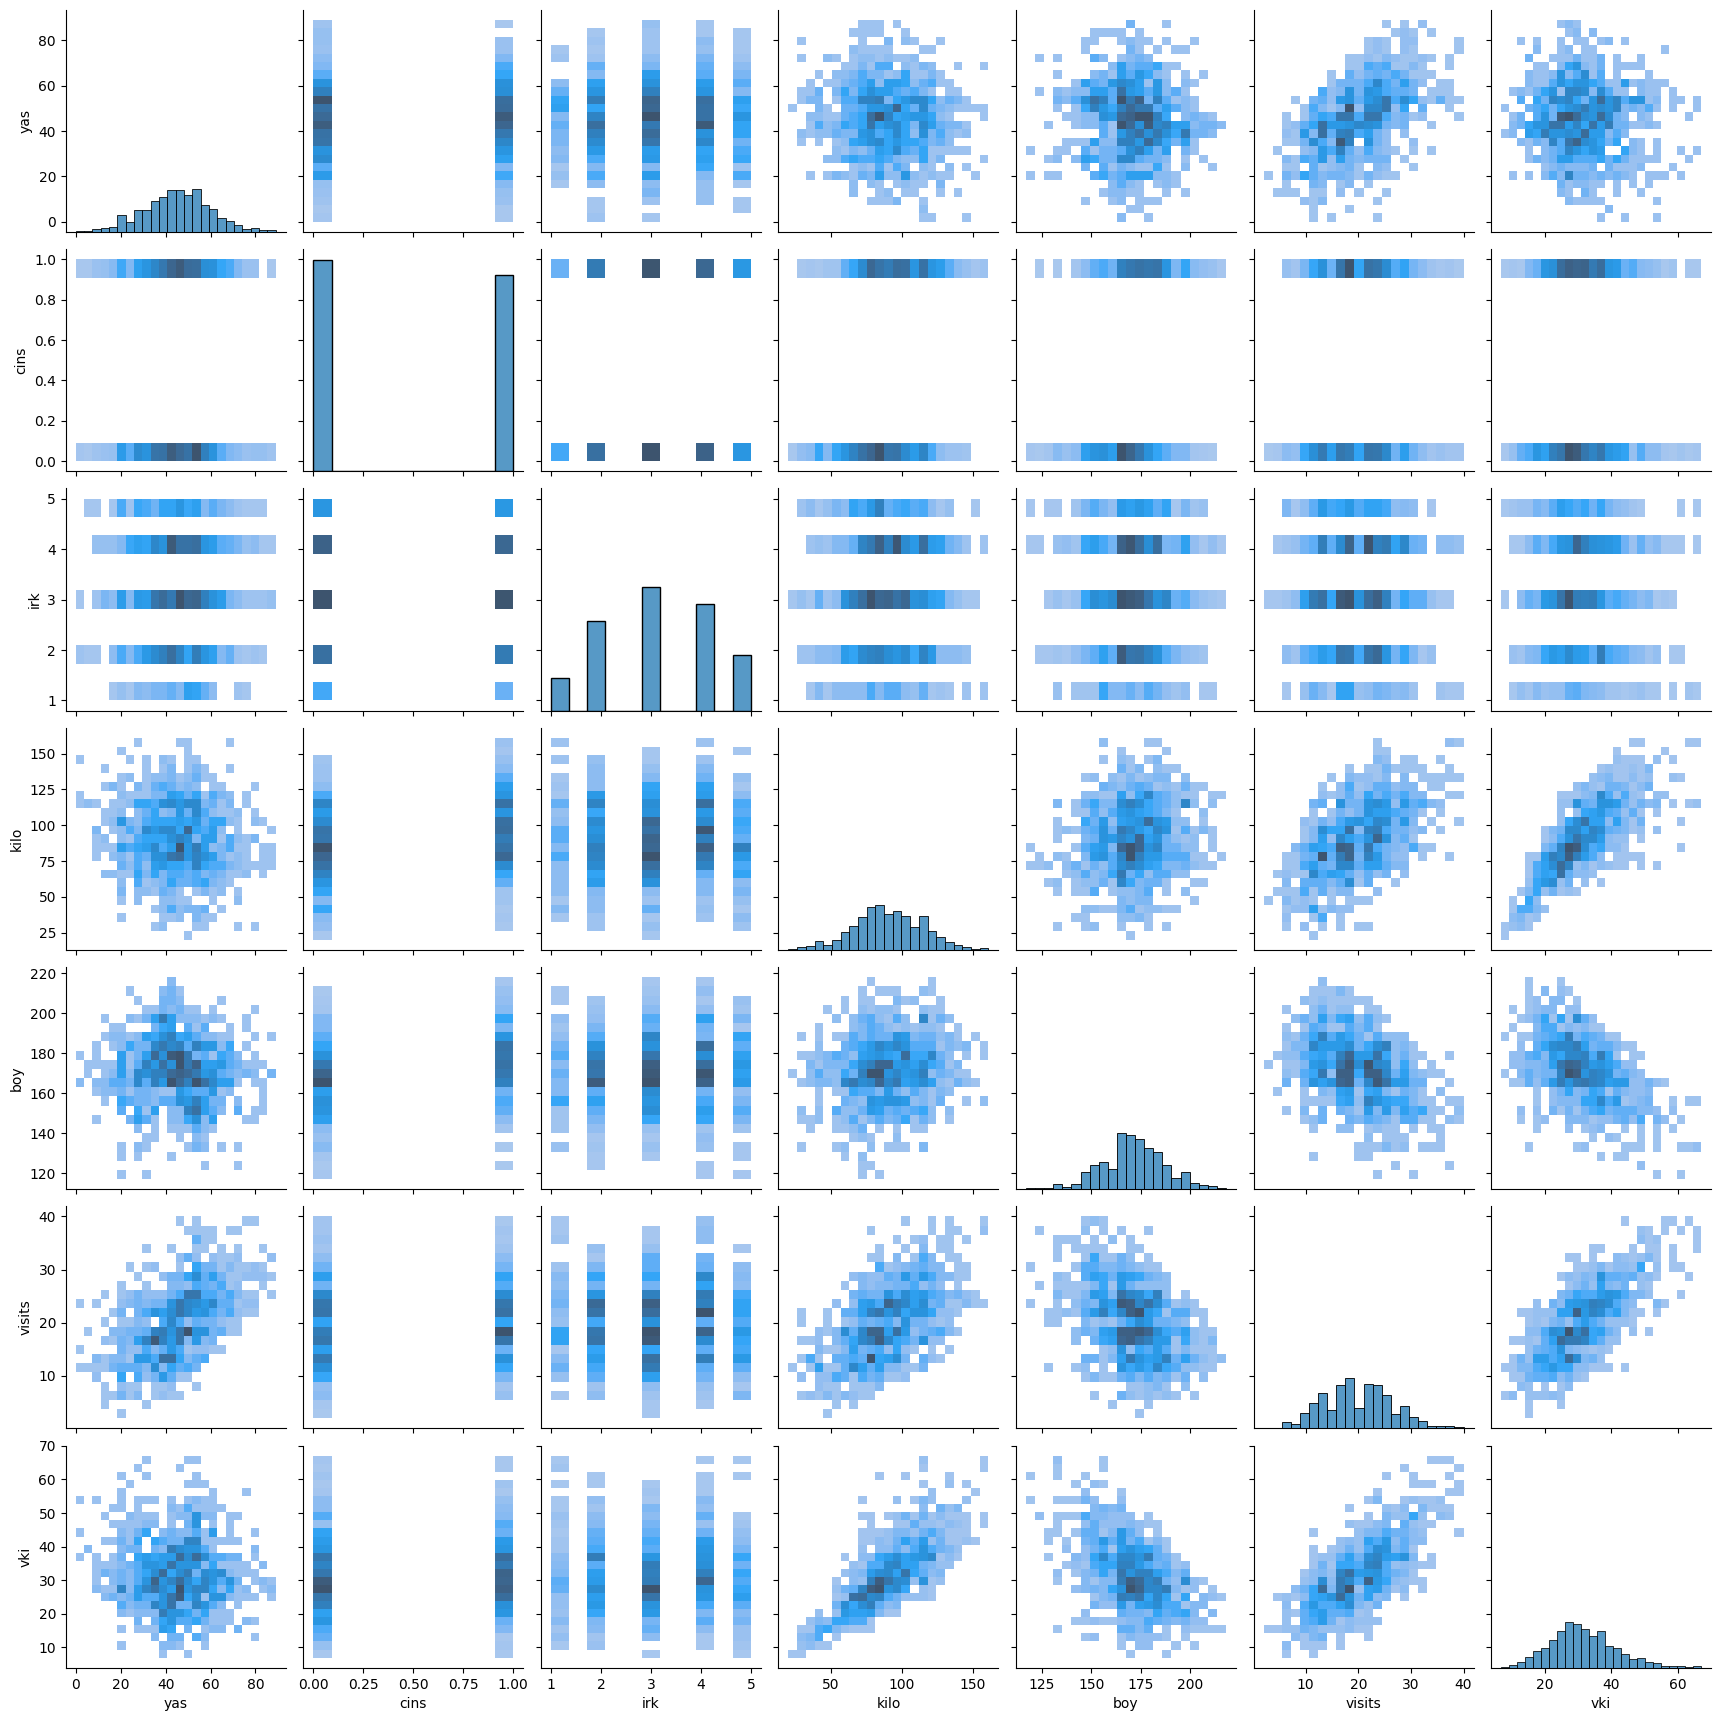

In [9]:
sns.pairplot(data=df, kind="hist")

In [10]:
# Eklendi vücüt kitle indeksimiz
df.head(3)

,yas,cins,irk,kilo,boy,visits,vki
0,47,0,4,112.0,165.0,28,41.14
1,26,1,3,128.0,168.0,23,45.35
2,26,1,2,91.0,173.0,14,30.41


In [11]:
X = df.drop("visits", axis=1)
y = df["visits"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [21]:
print(X_train.shape)
X_train.head(2)

(700, 6)


,yas,cins,irk,kilo,boy,vki
26,45,0,4,101.0,196.0,26.29
155,21,1,5,85.0,178.0,26.83


In [22]:
print(X_test.shape)
X_test.head(2)

(300, 6)


,yas,cins,irk,kilo,boy,vki
890,72,1,2,88.0,175.0,28.73
983,47,0,2,79.0,183.0,23.59


In [23]:
# Verilerimiz ayrıldı modelimizi oluşturalım bakalım vki modelimizin öğrenmesinde data augmentation yaptığımız için katkı sağlayacakmı

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
test_model = LinearRegression()
test_model.fit(X_train, y_train)

LinearRegression()

In [26]:
test_preds = test_model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [30]:
print("MAE :",round(mean_squared_error(test_preds, y_test),2))
print("RMSE :",round(np.sqrt(root_mean_squared_error(test_preds, y_test)),2))
print("R2 Score :",round(r2_score(test_preds, y_test),2))

MAE : 6.14
RMSE : 1.57
R2 Score : 0.84


In [31]:
# Biraz daha iyi durumda test verimizde son modelimizi oluşturalım

In [34]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [39]:
df.head(2)

,yas,cins,irk,kilo,boy,visits,vki
0,47,0,4,112.0,165.0,28,41.14
1,26,1,3,128.0,168.0,23,45.35


In [38]:
final_model.coef_  
# Buradakiler hangi verinin modeli ne kadar etkilediği
# Buradaki katsayılara bakar yas cins ve vki çok etkilemiş hastahaneye gitmeyi

array([0.24872833, 0.10676195, 0.02742311, 0.00632256, 0.00213747,
       0.48326475])

In [35]:
final_pred = final_model.predict(X)

In [36]:
print("MAE :",round(mean_squared_error(final_pred, y),2))
print("RMSE :",round(np.sqrt(root_mean_squared_error(final_pred, y)),2))
print("R2 Score :",round(r2_score(final_pred, y),2))

MAE : 6.27
RMSE : 1.58
R2 Score : 0.82


In [ ]:
# Verilerimizin hepsini verince biraz daha düştü ama sıkıntı yok 

In [42]:
# Denemeler
insancik = [[25,0,3,45,150,20]]
final_model.predict(insancik)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.02278549])

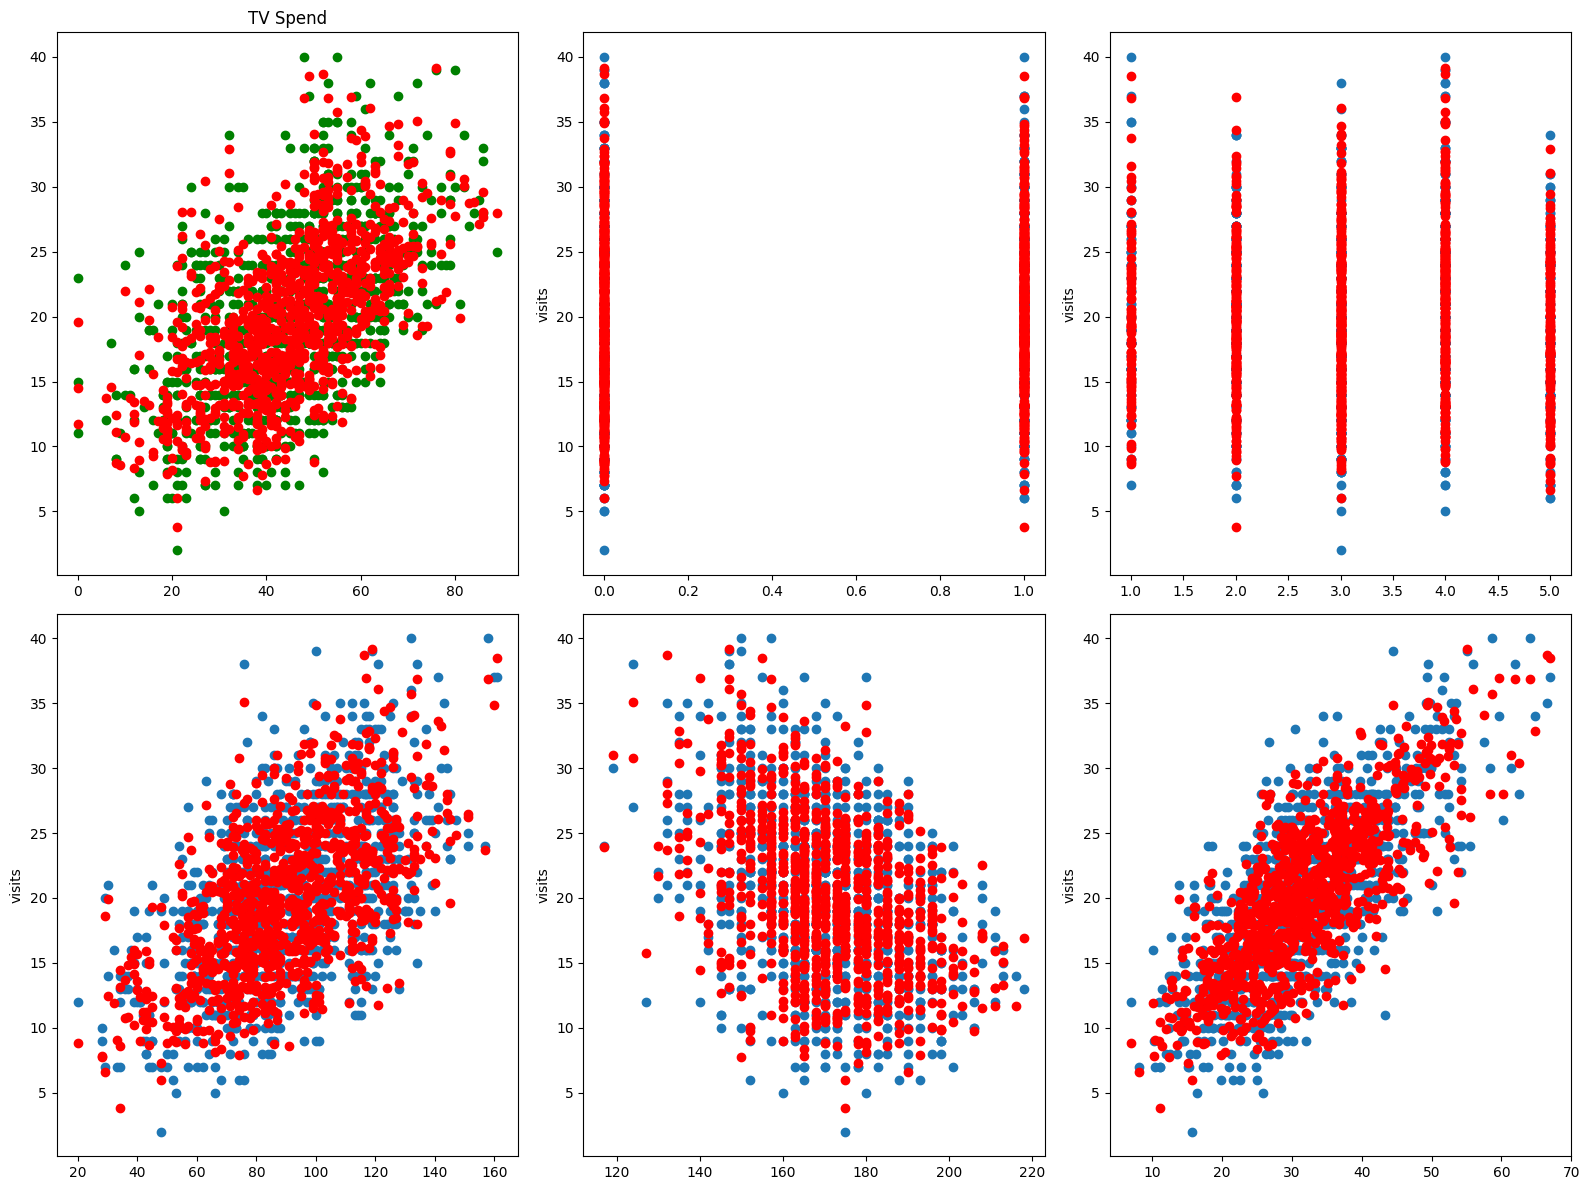

In [45]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,12))

axes[0,0].plot(df['yas'],df['visits'],'o', color ="green")
axes[0,0].plot(df['yas'],final_pred,'o',color='red')
axes[0,0].set_title("TV Spend")

axes[0,1].plot(df['cins'],df['visits'],'o')
axes[0,1].plot(df['cins'],final_pred,'o',color='red')
axes[0,1].set_ylabel("visits")

axes[0,2].plot(df['irk'],df['visits'],'o')
axes[0,2].plot(df['irk'],final_pred,'o',color='red')
axes[0,2].set_ylabel("visits")

axes[1,0].plot(df['kilo'],df['visits'],'o')
axes[1,0].plot(df['kilo'],final_pred,'o',color='red')
axes[1,0].set_ylabel("visits")

axes[1,1].plot(df['boy'],df['visits'],'o')
axes[1,1].plot(df['boy'],final_pred,'o',color='red')
axes[1,1].set_ylabel("visits")

axes[1,2].plot(df['vki'],df['visits'],'o')
axes[1,2].plot(df['vki'],final_pred,'o',color='red')
axes[1,2].set_ylabel("visits")

plt.tight_layout();